In [5]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

figdir = "./"

In [6]:
# !pip install squarify
# import squarify

In [7]:
subtypes_subset = np.array([
    "Ia-norm", "Ia-91T", "Ia-91bg", "Iax", #"Ia-csm", "Ia-pec",
    "Ib-norm", "Ibn", "IIb", #"Ib-pec",
    "Ic-norm", "Ic-broad", #"Ic-pec",
    "IIP", #"IIL", "IIn", "II-pec",
])
subtypes_subset

array(['Ia-norm', 'Ia-91T', 'Ia-91bg', 'Iax', 'Ib-norm', 'Ibn', 'IIb',
       'Ic-norm', 'Ic-broad', 'IIP'], dtype='<U8')

In [8]:
df = pd.read_parquet("../data/original_resolution_parquet/df_preprocessed.parquet")

counts = np.array([0 for subtype in subtypes_subset])
for i, subtype in enumerate(subtypes_subset):
    ind = (df["SN Subtype"] == subtype)
    num_spec = df[ind].shape[0]
    counts[i] = num_spec

In [9]:
df.shape

(4013, 1029)

In [57]:
sntype_SNe = {sntype: 0 for sntype in df["SN Subtype"].unique()}

nSNe = 0
for SN in df.index.unique():
    # print(SN)
    
    df_SN = df.loc[SN]
    if df_SN.ndim == 1:
        sntype = df_SN["SN Subtype"]
    else:
        sntype = df_SN["SN Subtype"].unique()
        assert len(sntype) == 1
        sntype = sntype[0]

    if sntype in subtypes_subset:
        sntype_SNe[sntype] += 1
        nSNe += 1


sntype_SNe, nSNe

({'Ia-norm': 319,
  'Ia-91T': 36,
  'Ia-csm': 0,
  'Ia-91bg': 42,
  'Ib-norm': 22,
  'Ia-pec': 0,
  'Ic-norm': 21,
  'IIP': 6,
  'Iax': 6,
  'IIL': 0,
  'IIb': 19,
  'II-pec': 0,
  'Ic-broad': 24,
  'Ic-pec': 0,
  'IIn': 0,
  'Ibn': 3,
  'Ib-pec': 0},
 498)

In [51]:
df.loc["sn03ai"]["SN Subtype"]

'Ia-norm'

['Ia-norm']
Categories (17, object): ['II-pec', 'IIL', 'IIP', 'IIb', ..., 'Ibn', 'Ic-broad', 'Ic-norm', 'Ic-pec']

In [6]:
counts

array([2114,  348,  232,   62,  211,   27,  232,  206,  228,  104])

In [6]:
subtypes_subset

array(['Ia-norm', 'Ia-91T', 'Ia-91bg', 'Iax', 'Ib-norm', 'Ibn', 'IIb',
       'Ic-norm', 'Ic-broad', 'IIP'], dtype='<U8')

In [7]:
rates = counts / counts.sum()
rates

array([0.56163656, 0.09245484, 0.06163656, 0.01647184, 0.05605739,
       0.00717322, 0.06163656, 0.05472901, 0.06057386, 0.02763018])

In [8]:
colors = [
    "tab:blue",
    "tab:blue",
    "tab:blue",
    "tab:blue",

    "tab:orange",
    "tab:orange",
    "tab:orange",

    "tab:green",
    "tab:green",

    "tab:red",
]

In [9]:
subtypes_subset = np.array([
    "Ia-norm", "Ia-91T", "Ia-91bg", "Iax", #"Ia-csm", "Ia-pec",
    "Ib-norm", "", "IIb", #"Ib-pec",
    "Ic-norm", "Ic-broad", #"Ic-pec",
    "IIP", #"IIL", "IIn", "II-pec",
])
subtypes_subset

array(['Ia-norm', 'Ia-91T', 'Ia-91bg', 'Iax', 'Ib-norm', '', 'IIb',
       'Ic-norm', 'Ic-broad', 'IIP'], dtype='<U8')

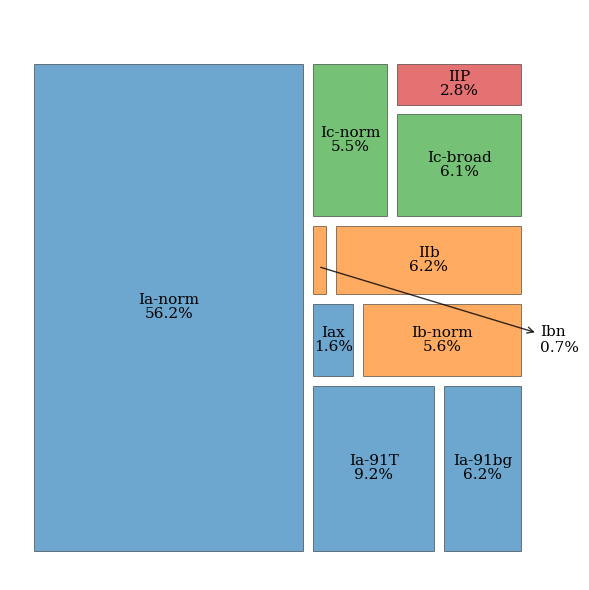

In [18]:
plt.figure(figsize=(6, 6))
squarify.plot(
    sizes=rates,
    value=[f"{rate*100:.1f}%" if rate > 0.01 else "" for rate in rates ],
    label=subtypes_subset,
    pad=True,
    color=colors,
    alpha=0.65,
    bar_kwargs={
        "edgecolor": "k",
        "linewidth": 0.5,
    },
    text_kwargs={
        "fontsize": 11,
        "fontfamily": "serif",
        # "weight": "bold",
    }
).set()

plt.annotate(
    text=f"Ibn\n{rates[5]*100:.1f}%",
    xy=(0.575, 0.55),
    xytext=(0.99, 0.4),
    xycoords="axes fraction",
    arrowprops={"arrowstyle": "<-", "alpha": 0.8},
    fontfamily="serif",
    fontsize=11,
)

plt.axis('equal')
plt.axis("off")
plt.tight_layout()
# plt.savefig(os.path.join(figdir, "treemap.pdf"))
# plt.savefig(os.path.join(figdir, "treemap.png"))
plt.show()